## 포스트 코로나 데이터 시각화

- 가설1:  배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.
- 가설2: 유동인구 수가 감소하는 시기에는 뷰티소품의 구매율이 감소할 것이다.

### 필요한 모듈 임포트

In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series, DataFrame

import datetime

import warnings
warnings.filterwarnings('ignore')


os.name == 'nt'
plt.rc('font', family='Malgun Gothic')

## 가설1. 배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.

In [3]:
#배달 주문량이 증가함을 시각화 &  배달 업체 수수료 증가 시각화 &  배달팁이 증가함을 보여야 함
dlvr = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/delivery.csv")
dlvr.head(5)

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


In [6]:
# 배달 주문량의 증가를 시각화하기 위해서 시간에 따른 음식 배달 건수를 count 한 결과 보여주기
# index: 배달 접수 시간(dlvr_rcept_time) , col: 배달 상점 업종 이름(dlvr_store_induty_nm), 
# data: count(serial_number)

pd.crosstab(index =dlvr.DLVR_RCEPT_TIME , columns = dlvr.DLVR_STORE_INDUTY_NM, values = dlvr.SERIAL_NUMBER, aggfunc = "sum")

DLVR_STORE_INDUTY_NM,도시락,돈까스/일식,배달전문업체,분식,심부름,아시안/양식,야식,족발/보쌈,중식,찜탕,치킨,카페/디저트,패스트푸드,피자,한식,회
DLVR_RCEPT_TIME,,,,,,,,,,,,,,,,
2020-01-01 00:00:02,NaN,NaN,NaN,4579306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4578871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9157762.0,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4579387.0,4578977.0,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4578856.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-21 23:59:28,NaN,NaN,NaN,NaN,NaN,NaN,10672339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-21 23:59:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10672161.0,NaN,NaN,NaN,NaN,NaN
2020-06-21 23:59:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10672331.0,NaN,NaN,NaN,NaN,NaN


### 1) 주 단위로 평균량 시각화
* delivery 데이터에서 데이터 순서를 나타내는 'SERIAL_NUMBER' 데이터를 이용해 배달 주문량을 계산
* 'SERIAL_NUMBER'를 주 단위로 평균을 내서 시각화함

In [105]:
#주 단위로 평균량 보기

dlvr['date'] = pd.to_datetime(dlvr['PROCESS_DT'])
dlvr['date'] = dlvr['date'].apply( lambda dlvr: datetime.datetime(year=dlvr.year, month=dlvr.month, day=dlvr.day))
dlvr.set_index('date',inplace=True)

dlvr_weekly_avg = dlvr.resample('W').mean()
dlvr_weekly_avg.head(10)

,SERIAL_NUMBER,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE
date,,,,,,,,,,,,
2020-01-05,4.660980e+06,1.017774,3.614282e+09,3.614327e+09,3.615599e+11,3.544882e+09,3.545169e+09,3.545351e+11,3606.099923,256.348042,23269.853197,1.815447
2020-01-12,4.869163e+06,1.020417,3.645446e+09,3.645491e+09,3.646991e+11,3.578341e+09,3.578721e+09,3.577973e+11,3618.991303,259.840167,23111.337533,1.813684
2020-01-19,5.103381e+06,1.014450,3.646142e+09,3.646187e+09,3.645918e+11,3.578880e+09,3.579646e+09,3.578362e+11,3584.901673,261.810332,22792.016185,1.815605
2020-01-26,5.306154e+06,1.017220,3.682581e+09,3.682626e+09,3.684884e+11,3.619573e+09,3.619981e+09,3.618578e+11,3731.002006,263.297380,23814.861383,1.837174
2020-02-02,5.519400e+06,1.018268,3.665669e+09,3.665713e+09,3.666837e+11,3.598934e+09,3.599374e+09,3.598024e+11,3613.270849,261.684852,23145.486580,1.856990
2020-02-09,5.767227e+06,1.019059,3.691074e+09,3.691118e+09,3.692478e+11,3.627668e+09,3.628176e+09,3.627296e+11,3608.194307,266.229076,23180.739827,1.829353
2020-02-16,6.015541e+06,1.021273,3.690412e+09,3.690456e+09,3.691357e+11,3.623776e+09,3.624315e+09,3.622806e+11,3634.025781,262.897449,23182.269808,1.823456
2020-02-23,6.274805e+06,1.021678,3.675621e+09,3.675665e+09,3.675545e+11,3.607841e+09,3.608603e+09,3.604964e+11,3614.267509,260.171436,23232.196479,1.822563
2020-03-01,6.515896e+06,1.022670,3.698272e+09,3.698316e+09,3.699153e+11,3.635029e+09,3.635569e+09,3.632438e+11,3633.275812,260.897626,23726.293061,1.824139


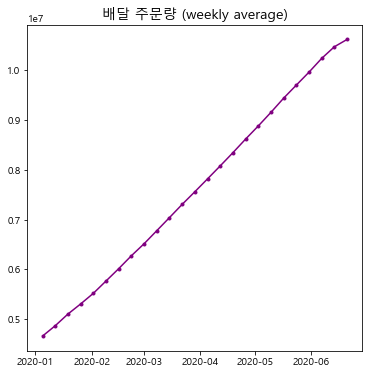

In [29]:
#주문량 시각화

fig = plt.figure()
fig.set_size_inches(6, 6)
plt.plot(dlvr_weekly_avg['SERIAL_NUMBER'], c='purple', marker='.')
plt.title('배달 주문량 (weekly average)', fontsize = 14)
plt.show()

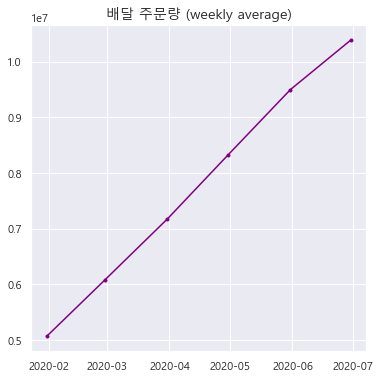

In [109]:
dlvr_monthly_avg = dlvr.resample('M').mean()

fig = plt.figure()
fig.set_size_inches(6, 6)
plt.plot(dlvr_monthly_avg['SERIAL_NUMBER'], c='purple', marker='.')
plt.title('배달 주문량 (weekly average)', fontsize = 14)
plt.show()

- 결과
    * 시간이 지날수록 배달 주문량이 꾸준히 증가함을 알 수 있다.

### 2) 수수료 & 배달비 증가 시각화

In [33]:
#수수료 & 배달비 

dlvr[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]].head(10)

,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT
date,,
2020-01-01,4290,300
2020-01-01,4800,200
2020-01-01,3300,300
2020-01-01,4500,300
2020-01-01,6500,300
2020-01-01,3500,200
2020-01-01,3800,300
2020-01-01,3500,200
2020-01-01,4800,200


- 월 별로 배달비 & 수수료의 변화 추세를 시각화 (평균값)

In [65]:
#월 단위로 평균값 계산

dlvr_monthly_avg = dlvr.resample('M').mean()
dlvr_monthly_avg[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]]

,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT
date,,
2020-01-31,3630.214523,260.706505
2020-02-29,3620.551579,262.544649
2020-03-31,3628.074970,268.705586
2020-04-30,3690.031827,272.418702
2020-05-31,3686.859705,269.078660
2020-06-30,3676.117379,268.086023


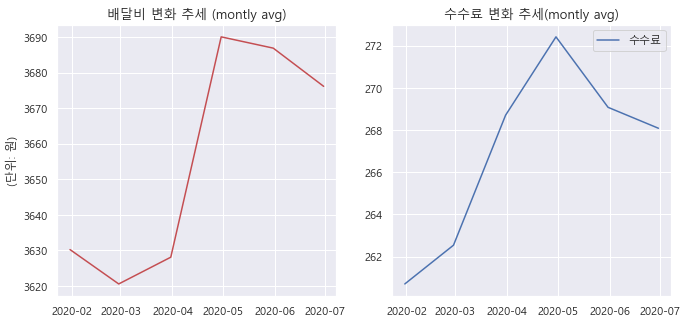

In [80]:
# 시간에 따른 수수료 & 배달비 변화 시각화

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

dlvr_monthly_avg = dlvr.resample('M').mean()

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].plot(dlvr_monthly_avg["DLVR_AMOUNT"], c="r", linestyle="-")
ax[1].plot(dlvr_monthly_avg["CALL_RLAY_FEE_AMOUNT"],color="b", linestyle="-", label='수수료') 

ax[0].set_title("배달비 변화 추세 (montly avg)",fontsize="13")
ax[0].set_ylabel("(단위: 원)")

ax[1].set_title("수수료 변화 추세(montly avg)",fontsize="13")

plt.legend(shadow=False, fancybox=True)

plt.show()

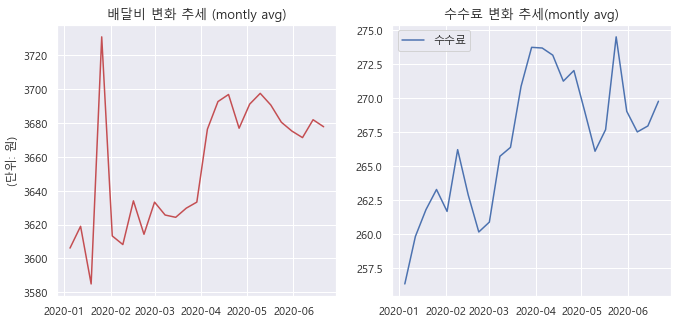

In [107]:
#weekly average

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].plot(dlvr_weekly_avg["DLVR_AMOUNT"], c="r", linestyle="-")
ax[1].plot(dlvr_weekly_avg["CALL_RLAY_FEE_AMOUNT"],color="b", linestyle="-", label='수수료') 

ax[0].set_title("배달비 변화 추세 (montly avg)",fontsize="13")
ax[0].set_ylabel("(단위: 원)")

ax[1].set_title("수수료 변화 추세(montly avg)",fontsize="13")

plt.legend(shadow=False, fancybox=True)

plt.show()

##### -> weekly average 는 기복이 있었고  montly average로 봤을 때는 흐름을 어느 정도 읽을 수 있었다.

-  결과:
   -  배달비와 수수료는 2020년 4월 즈음, 급격하게 증가한 상황을 알 수 있다.
  
   >  배달 주문량의 증가와 배달비 및 수수료의 증가가 서로 연관되어 있다고 추측하였고 
둘의 상관관계가 실제로 존재하는지 확인해보도록 하자.

In [100]:
#주문량과 배달비와의 상관계수

dlvr.DLVR_AMOUNT.corr(dlvr.SERIAL_NUMBER)

0.030769183617585676

In [99]:
#주문량과 수수료와의 상관계수

dlvr.CALL_RLAY_FEE_AMOUNT.corr(dlvr.SERIAL_NUMBER)

0.020124854779485855

In [97]:
#배달비와 수수료의 상관계수

dlvr.DLVR_AMOUNT.corr(dlvr.CALL_RLAY_FEE_AMOUNT)

0.13644408646980236

<Figure size 1008x1008 with 0 Axes>

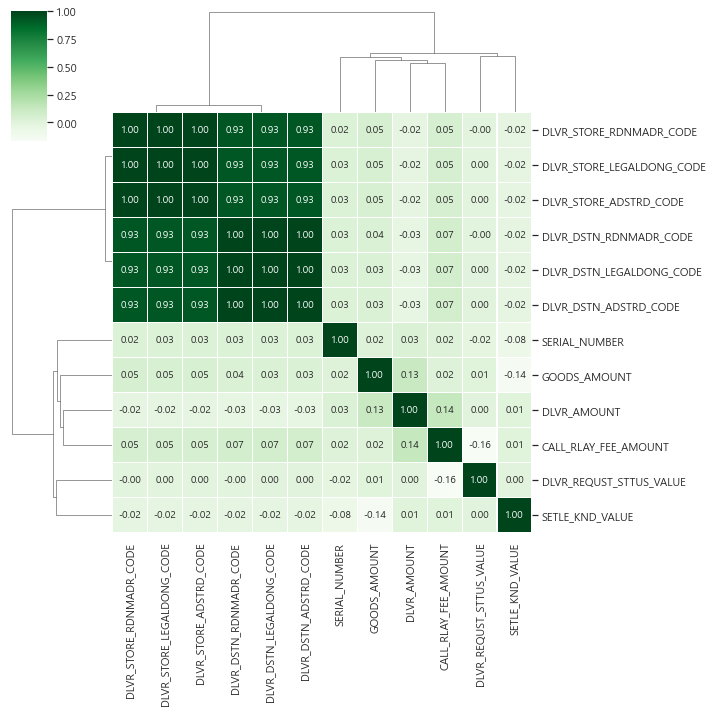

In [102]:
#delivery 데이터 간 상관관계 파악 -> clustermatp 

plt.figure(figsize=(14,14))
sns.clustermap(data = dlvr.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Greens')

- 배달비와 배달 주문량의 상관계수가 0.307로 수수료와의 상관계수보다 더 높지만 크게 상관이 있어 보이지는 않다.

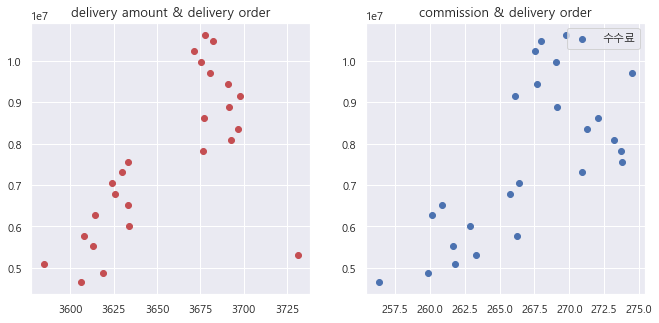

In [141]:
#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(dlvr_weekly_avg["DLVR_AMOUNT"], dlvr_weekly_avg["SERIAL_NUMBER"],c="r")
ax[1].scatter(dlvr_weekly_avg["CALL_RLAY_FEE_AMOUNT"], dlvr_weekly_avg["SERIAL_NUMBER"],color="b",label="수수료") 

ax[0].set_title("delivery amount & delivery order",fontsize="13")
ax[1].set_title("commission & delivery order",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

- 결과
  - ..?

## 가설2: 유동 인구 수가 감소하는 시기에는 뷰티용품 구매율이 감소할 것이다.

- 데이터 불러오기 (유동인구)

In [2]:
fpopl = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/fpopl.csv")

#month 컬럼 만들어서 월 별 비교하기
fpopl['month'] = pd.to_datetime(fpopl['base_ymd']).dt.month

In [4]:
fpopl.head(10)

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,month
0,20200101,0,M,age_00,11650560,15,1
1,20200101,0,M,age_00,11590620,6,1
2,20200101,0,M,age_00,11560710,4,1
3,20200101,0,M,age_00,11470680,12,1
4,20200101,0,M,age_00,11350665,6,1
5,20200101,0,M,age_00,11305575,10,1
6,20200101,0,M,age_00,11290725,12,1
7,20200101,0,F,age_00,11740540,12,1
8,20200101,0,F,age_00,11680600,16,1
9,20200101,0,F,age_00,11620525,9,1


In [ ]:
#월 별로 유동인구 수 비교

sns.set(style="darkgrid")
sns.barplot(x="month", y="popltn_cascnt", data=fpopl)

- 시간에 따른 뷰티소품 구매율 변화 시각화

In [5]:
#데이터 불러오기 (구매 물품)
buy = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/index.csv")

#period 컬럼에서 데이터 출력 방식 정하기
buy['period'] = buy['period'].astype(str)
buy['period'] = buy['period'].apply(lambda x : x[:4] + '-' + x[-2:])
buy['period'] = pd.to_datetime(buy['period'])
buy['month'] = pd.to_datetime(buy['period']).dt.month
buy['year'] = pd.to_datetime(buy['period']).dt.year

buy

,period,catl,catm,age,gender,sido,sigungu,cgi,month,year
0,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,1,2019
1,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,1,2019
2,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,1,2019
3,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,1,2019
4,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,1,2019
...,...,...,...,...,...,...,...,...,...,...
127520,2020-05-01,화장품,화장품,all,all,서울,강서구,51.365660,5,2020
127521,2020-05-01,화장품,화장품,all,all,서울,관악구,61.997865,5,2020
127522,2020-05-01,화장품,화장품,all,all,서울,금천구,82.198402,5,2020
127523,2020-05-01,화장품,화장품,all,all,서울,도봉구,35.875600,5,2020


In [23]:
grouped = buy.groupby("catm")
df = grouped.get_group("뷰티소품")

df.groupby(['year','month']).agg({'catm':"count"})
#sns.lineplot(x="period", y=[buy['catl'] == '뷰티용품'],data=buy, color="r")


catm
year month      
2019 1       445
     2       451
     3       461
     4       463
     5       458
     6       454
     7       458
     8       464
     9       461
     10      460
     11      460
     12      463
2020 1       458
     2       461
     3       460
     4       461
     5       450

In [24]:
#2020년 자료만 추출

df_2020 = df[df['year']== 2020].groupby('month').agg({'catm':"count"})
df_2020 

,catm
month,
1,458
2,461
3,460
4,461
5,450


In [16]:
# 뷰티소품 소비지수 변화 시각화

bt = sns.countplot(x="month", data=df_2020)
bt.set_ylabel('뷰피소품 소비지수')
bt.set_title('뷰티소품 소비지수의 변화')

ValueError: Could not interpret input 'month'